In [1]:
from numpy import random
random.seed(2814)

In [34]:
from numpy import load
import pickle

X_train = load('../../data/interim//Design/X_train.npy')
X_test = load('../../data/interim/Design/X_test.npy')
y_train = load('../../data/interim/Design/y_train.npy')
y_test = load('../../data/interim/Design/y_test.npy')

In [2]:
loaded_model = pickle.load(open('../../models/final_model.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8088409108817272


In [3]:
import pandas as pd
pd.DataFrame(y_train).value_counts().sort_index()

0     97294
1     96900
2     96627
3     96464
4     94818
5     86912
6     75265
7     68420
8     69375
9     73321
10    81233
11    90512
12    93190
13    94137
14    95307
dtype: int64

In [4]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
_, X_strat, _, y_strat = train_test_split(
X_train, y_train, test_size=0.013, random_state=2814, stratify=y_train)

In [5]:
len(X_strat)

17028

## 1. KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
parameters_KNN = {
    'n_neighbors': range(1,50,2),
    'leaf_size': range(20,40,5),
    'weights': ('uniform', 'distance'),
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
    'metric': ['minkowski']}

scoring = 'f1_macro'

knn = KNeighborsClassifier()

from sklearn.model_selection import StratifiedKFold, GridSearchCV
grid_knn = GridSearchCV(knn, parameters_KNN, cv=StratifiedKFold(10), scoring=scoring)

In [12]:
grid_knn.fit(X_strat, y_strat)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': range(20, 40, 5), 'metric': ['minkowski'],
                         'n_neighbors': range(1, 50, 2),
                         'weights': ('uniform', 'distance')},
             scoring='f1_macro')

In [13]:
grid_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 27,
 'weights': 'distance'}

In [14]:
grid_knn.best_score_

0.350528806577099

In [15]:
y_pred_grid_knn = grid_knn.predict(X_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_grid_knn))

              precision    recall  f1-score   support

           0       0.03      0.68      0.06       196
           1       0.67      0.54      0.60      5195
           2       0.69      0.55      0.61      6857
           3       0.15      0.39      0.21      2773
           4       0.16      0.30      0.21      6231
           5       0.22      0.25      0.24     15040
           6       0.27      0.19      0.22     22077
           7       0.27      0.15      0.19     24325
           8       0.24      0.15      0.18     23215
           9       0.23      0.16      0.19     22520
          10       0.21      0.19      0.20     19384
          11       0.13      0.20      0.16     11198
          12       0.13      0.23      0.17      8873
          13       0.17      0.30      0.22      9191
          14       0.55      0.61      0.58     13290

    accuracy                           0.25    190365
   macro avg       0.28      0.33      0.27    190365
weighted avg       0.27   

In [2]:
from sklearn.neighbors import KNeighborsClassifier
knn_optimal = KNeighborsClassifier(
    algorithm = 'auto',
    leaf_size = 20,
    metric = 'minkowski',
    n_neighbors = 13,
    weights = 'distance'
)

knn_optimal.fit(X_train, y_train)
y_pred_knn_optimal = knn_optimal.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn_optimal))

              precision    recall  f1-score   support

           0       0.10      0.35      0.15       196
           1       0.74      0.75      0.74      5195
           2       0.72      0.67      0.70      6857
           3       0.20      0.47      0.28      2773
           4       0.22      0.41      0.29      6231
           5       0.29      0.35      0.32     15040
           6       0.34      0.28      0.31     22077
           7       0.34      0.22      0.27     24325
           8       0.31      0.23      0.27     23215
           9       0.30      0.23      0.26     22520
          10       0.29      0.25      0.26     19384
          11       0.19      0.29      0.23     11198
          12       0.18      0.30      0.22      8873
          13       0.25      0.35      0.29      9191
          14       0.69      0.64      0.66     13290

    accuracy                           0.33    190365
   macro avg       0.34      0.39      0.35    190365
weighted avg       0.34   

In [4]:
from sklearn.preprocessing import LabelEncoder
yle = LabelEncoder()
y_train = yle.fit_transform(y_train)
y_test = yle.transform(y_test)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 15)
y_test = to_categorical(y_test, 15)

In [7]:
classes=['A1','A2','A3','B1','B2','B3','C1','C2','C3','D1','D2','E1','E2','F','G']
features = [
    'CountyName',
	'DwellingTypeDescr',
    'YearofConstruction',
    'GroundFloorArea(sq m)',
    'MainSpaceHeatingFuel',	
    'MainWaterHeatingFuel',	
    'VentilationMethod',
    'StructureType',
    'NoOfSidesSheltered',
    'InsulationType',
    'InsulationThickness',
    'TotalDeliveredEnergy',
    'EnergyCost']

import matplotlib.pyplot as plt

In [19]:
roc_curve(y_test, y_pred_knn_optimal)

ValueError: multiclass format is not supported

In [11]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(15):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_knn_optimal[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_knn_optimal.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area


# Plot all ROC curves
fig, ax = plt.subplots(figsize=(12,10))
plt.grid(False)
plt.figure(1)


plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='red', linestyle=':', linewidth=4)



plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.legend(loc='lower right')
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(15), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc='lower right')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [141]:
plt.figure(figsize=(12,8))
plt.title("Precision-Recall Curve", fontsize=18)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
viz = PrecisionRecallCurve(knn_optimal, classes=classes)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
plt.legend(loc='center', fontsize=12)
plt.grid(False)

ValueError: y should be a 1d array, got an array of shape (15, 2) instead.

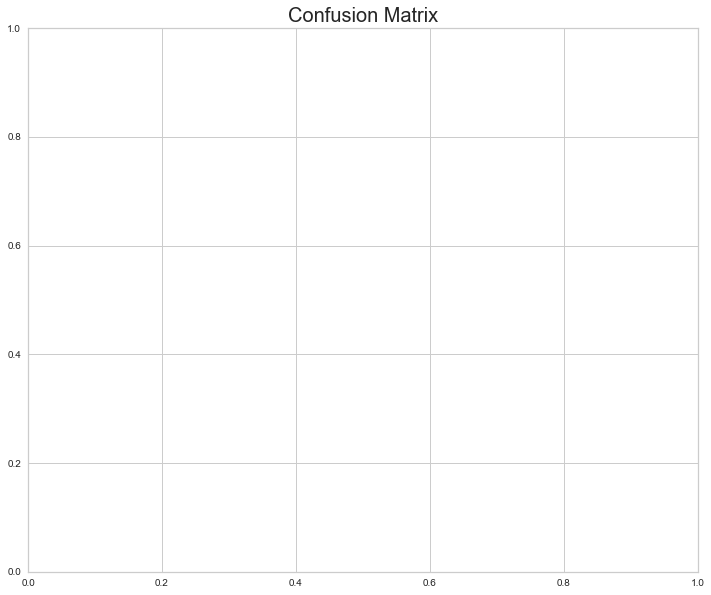

In [123]:
X_train.shape

(1309775, 13)

---

## 2. Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
parameters_dt = {
    'criterion' : ("gini", "entropy", "log_loss"),
    'splitter' : ("best", "random"),
    'max_depth': range(10,100,10),
    'min_samples_split': range(2,10,2),
    'min_samples_leaf': range(2,10,2)
}

scoring = 'f1_macro'

dt = DecisionTreeClassifier()

from sklearn.model_selection import StratifiedKFold, GridSearchCV
grid_dt = GridSearchCV(dt, parameters_dt, cv=StratifiedKFold(10), scoring=scoring)

In [19]:
grid_dt.fit(X_strat, y_strat)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': range(10, 100, 10),
                         'min_samples_leaf': range(2, 10, 2),
                         'min_samples_split': range(2, 10, 2),
                         'splitter': ('best', 'random')},
             scoring='f1_macro')

In [20]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 80,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'splitter': 'best'}

In [21]:
grid_dt.best_score_

0.6713513050006431

In [22]:
y_pred_grid_dt = grid_dt.predict(X_test)

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_grid_dt))

              precision    recall  f1-score   support

           0       0.07      0.69      0.13       196
           1       0.76      0.70      0.73      5195
           2       0.77      0.65      0.70      6857
           3       0.33      0.61      0.42      2773
           4       0.39      0.59      0.47      6231
           5       0.65      0.57      0.61     15040
           6       0.67      0.62      0.64     22077
           7       0.63      0.62      0.62     24325
           8       0.64      0.62      0.63     23215
           9       0.67      0.61      0.64     22520
          10       0.68      0.61      0.64     19384
          11       0.56      0.65      0.60     11198
          12       0.51      0.64      0.57      8873
          13       0.65      0.70      0.67      9191
          14       0.93      0.83      0.88     13290

    accuracy                           0.64    190365
   macro avg       0.59      0.65      0.60    190365
weighted avg       0.66   

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_optimal = DecisionTreeClassifier(
    criterion = 'log_loss',
    max_depth = 30,
    min_samples_leaf = 6,
    min_samples_split = 8,
    splitter = 'best'
)

dt_optimal.fit(X_train, y_train)
y_pred_dt_optimal = dt_optimal.predict_proba(X_test)

print(classification_report(y_test, y_pred_dt_optimal))

AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

In [36]:
y_pred_dt_optimal = dt_optimal.predict(X_test)

print(classification_report(y_test, y_pred_dt_optimal))

              precision    recall  f1-score   support

           0       0.22      0.40      0.28       196
           1       0.82      0.85      0.84      5195
           2       0.84      0.80      0.82      6857
           3       0.51      0.70      0.59      2773
           4       0.62      0.74      0.67      6231
           5       0.77      0.76      0.77     15040
           6       0.80      0.77      0.78     22077
           7       0.78      0.76      0.77     24325
           8       0.75      0.74      0.74     23215
           9       0.75      0.72      0.74     22520
          10       0.76      0.73      0.74     19384
          11       0.66      0.72      0.69     11198
          12       0.70      0.73      0.72      8873
          13       0.76      0.80      0.78      9191
          14       0.94      0.91      0.93     13290

    accuracy                           0.76    190365
   macro avg       0.71      0.74      0.72    190365
weighted avg       0.77   

In [28]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(15):
    fpr[i], tpr[i], _ = roc_curve(y_test[i], y_pred_dt_optimal[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_dt_optimal.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(15)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(15):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 15

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig, ax = plt.subplots(figsize=(12,10))
plt.grid(False)
plt.figure(1)


plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='red', linestyle=':', linewidth=4)



plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.legend(loc='lower right')
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(15), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc='lower right')
plt.show()

TypeError: Singleton array 7 cannot be considered a valid collection.

In [37]:
from yellowbrick.classifier import rocauc
auc(y_test, y_pred_dt_optimal)

ValueError: x is neither increasing nor decreasing : [7 8 6 ... 5 6 9].

---

## 3. Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
import sklearn
parameters_rf = {
    'criterion' : ("entropy", "log_loss"),
    'n_estimators': (100,200,500,1000),
    'max_depth': [40,50],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [2,3,4]
}

from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(sklearn.metrics.accuracy_score),
           'precision': make_scorer(sklearn.metrics.precision_score, average = 'macro'),
           'recall': make_scorer(sklearn.metrics.recall_score, average = 'macro'),
           'f1_macro': make_scorer(sklearn.metrics.f1_score, average = 'macro'),
           'f1_weighted': make_scorer(sklearn.metrics.f1_score, average = 'weighted')}

rf = RandomForestClassifier()

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import StratifiedKFold, HalvingGridSearchCV
grid_rf = HalvingGridSearchCV(rf, parameters_rf, cv=StratifiedKFold(10), scoring='f1_macro', factor = 3, verbose=1)

In [26]:
grid_rf.fit(X_strat, y_strat)

n_iterations: 4
n_required_iterations: 5
n_possible_iterations: 4
min_resources_: 300
max_resources_: 17028
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 144
n_resources: 300
Fitting 10 folds for each of 144 candidates, totalling 1440 fits
----------
iter: 1
n_candidates: 48
n_resources: 900
Fitting 10 folds for each of 48 candidates, totalling 480 fits
----------
iter: 2
n_candidates: 16
n_resources: 2700
Fitting 10 folds for each of 16 candidates, totalling 160 fits
----------
iter: 3
n_candidates: 6
n_resources: 8100
Fitting 10 folds for each of 6 candidates, totalling 60 fits


HalvingGridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                    estimator=RandomForestClassifier(),
                    param_grid={'criterion': ('entropy', 'log_loss'),
                                'max_depth': [40, 50],
                                'min_samples_leaf': [2, 3, 4],
                                'min_samples_split': [2, 3, 4],
                                'n_estimators': (100, 200, 500, 1000)},
                    scoring='f1_macro', verbose=1)

In [27]:
grid_rf.best_params_

{'criterion': 'log_loss',
 'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 1000}

In [28]:
grid_rf.best_score_

0.6113277949656102

In [29]:
y_pred_grid_rf = grid_rf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_grid_rf))

              precision    recall  f1-score   support

           0       0.10      0.65      0.17       196
           1       0.79      0.76      0.78      5195
           2       0.80      0.70      0.75      6857
           3       0.44      0.66      0.53      2773
           4       0.53      0.65      0.59      6231
           5       0.70      0.69      0.69     15040
           6       0.70      0.67      0.69     22077
           7       0.68      0.60      0.64     24325
           8       0.61      0.59      0.60     23215
           9       0.66      0.55      0.60     22520
          10       0.62      0.59      0.60     19384
          11       0.43      0.58      0.50     11198
          12       0.53      0.61      0.56      8873
          13       0.60      0.67      0.64      9191
          14       0.85      0.86      0.86     13290

    accuracy                           0.64    190365
   macro avg       0.60      0.66      0.61    190365
weighted avg       0.65   

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf_optimal = RandomForestClassifier(
    criterion = 'log_loss',
    n_estimators=250,
    random_state=2814,
    min_samples_leaf=2,
    min_samples_split=4,
    max_depth=50
)

rf_optimal.fit(X_train, y_train)
y_pred_rf_optimal = rf_optimal.predict(X_test)

print(classification_report(y_test, y_pred_rf_optimal))

              precision    recall  f1-score   support

           0       0.50      0.36      0.42       196
           1       0.89      0.88      0.88      5195
           2       0.87      0.87      0.87      6857
           3       0.64      0.75      0.69      2773
           4       0.75      0.78      0.77      6231
           5       0.82      0.84      0.83     15040
           6       0.85      0.82      0.83     22077
           7       0.84      0.80      0.82     24325
           8       0.81      0.77      0.79     23215
           9       0.80      0.77      0.78     22520
          10       0.78      0.79      0.79     19384
          11       0.70      0.77      0.73     11198
          12       0.72      0.77      0.75      8873
          13       0.77      0.84      0.80      9191
          14       0.95      0.93      0.94     13290

    accuracy                           0.81    190365
   macro avg       0.78      0.78      0.78    190365
weighted avg       0.81   

In [8]:
# Save our final model
import pickle
filename = '../../models/final_model.pkl'
pickle.dump(rf_optimal, open(filename, 'wb'))

In [17]:
filename = '../../models/dt_optimal.pkl'
pickle.dump(dt_optimal, open(filename, 'wb'))

In [21]:
# Save our final model
import pickle
filename = '../../models/knn_optimal.pkl'
pickle.dump(knn_optimal, open(filename, 'wb'))

In [11]:
estimator.save('model.h5')

AttributeError: 'KerasClassifier' object has no attribute 'save'

In [7]:
rf_optimal.feature_importances_

array([0.02653906, 0.03998235, 0.14743023, 0.25361107, 0.04874801,
       0.04657835, 0.04826114, 0.01704156, 0.01908529, 0.03727708,
       0.03058866, 0.15934807, 0.12550915])

---

## 4. Neural Network

In [37]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from scikeras.wrappers import KerasClassifier
import tensorflow as tf

In [38]:
from sklearn.preprocessing import LabelEncoder
yle = LabelEncoder()
y_strat = yle.fit_transform(y_strat)
y_test = yle.transform(y_test)
from tensorflow.keras.utils import to_categorical
y_strat = to_categorical(y_strat, 15)
y_test = to_categorical(y_test, 15)

In [41]:
def create_model():
# create model
    model = Sequential()
    model.add(Dense(32, input_dim = 13, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(15, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
    return model


In [42]:
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

model = KerasClassifier(model=create_model)
# define the grid search parameters
batch_size = [256, 512]
epochs = [2, 3, 4]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose = 0)
grid_result = grid.fit(X_strat, y_strat)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-08-14 17:24:09.091932: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-14 17:24:09.092361: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-14 17:24:09.111918: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-14 17:24:09.112647: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL,

Epoch 1/2
Epoch 1/3
Epoch 1/3
Epoch 1/2
Epoch 1/4
Epoch 1/4
Epoch 1/2
Epoch 1/3


2022-08-14 17:24:10.355106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:10.436428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:10.438018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:10.471946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:10.486769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:10.502167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:10.522902: I tensorflow/core/grappler/optimizers/cust

45/45 [==============================] - ETA: 0s - loss: 2.6969 - accuracy: 0.1000 - precision: 0.0000e+00 - recall: 0.0000e+00Epoch 2/3
Epoch 2/4
45/45 [==============================] - 5s 56ms/step - loss: 2.6969 - accuracy: 0.1000 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/2
Epoch 2/2
45/45 [==============================] - 5s 56ms/step - loss: 2.6890 - accuracy: 0.1011 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/3
45/45 [==============================] - 6s 62ms/step - loss: 2.7307 - accuracy: 0.1115 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 1s 29ms/step - loss: 2.6261 - accuracy: 0.1654 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/3
45/45 [==============================] - 1s 32ms/step - loss: 2.5782 - accuracy: 0.1517 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 1s 33ms/step - loss: 2.6220 - accuracy: 0.1384 - precision: 0.0000e+00 - recall: 0.0000

2022-08-14 17:24:16.792078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 1s 28ms/step - loss: 2.6042 - accuracy: 0.1549 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/4
40/45 [=========================>....] - ETA: 0s - loss: 2.5261 - accuracy: 0.1779 - precision: 0.0000e+00 - recall: 0.0000e+00

2022-08-14 17:24:17.523748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:17.556526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 1s 13ms/step
Epoch 1/4
45/45 [==============================] - 1s 30ms/step - loss: 2.6299 - accuracy: 0.1245 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/3
35/45 [======================>.......] - ETA: 0s - loss: 2.5057 - accuracy: 0.1613 - precision: 0.0000e+00 - recall: 0.0000e+00

2022-08-14 17:24:18.139872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:18.145175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 1s 26ms/step - loss: 2.4948 - accuracy: 0.1609 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/4
45/45 [==============================] - 1s 20ms/step - loss: 2.5224 - accuracy: 0.1295 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1/2
31/45 [===================>..........] - ETA: 0s - loss: 2.3886 - accuracy: 0.1683 - precision: 0.0000e+00 - recall: 0.0000e+00Epoch 1/3


2022-08-14 17:24:19.052220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:19.070110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 1s 21ms/step - loss: 2.3775 - accuracy: 0.1732 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 1/3


2022-08-14 17:24:19.553895: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 7ms/step
Epoch 1/4


2022-08-14 17:24:20.207922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:20.400259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:20.498125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:20.498907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:20.573548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 8/45 [====>.........................] - ETA: 2s - loss: 2.6897 - accuracy: 0.1099 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 

2022-08-14 17:24:20.991302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 4/23 [====>.........................] - ETA: 0s - loss: 2.6930 - accuracy: 0.1138 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

2022-08-14 17:24:21.404472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 3s 35ms/step - loss: 2.6721 - accuracy: 0.1169 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/2
23/23 [==============================] - 3s 39ms/step - loss: 2.6714 - accuracy: 0.1182 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/2
45/45 [==============================] - 5s 43ms/step - loss: 2.6492 - accuracy: 0.1305 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/4
23/23 [==============================] - 4s 30ms/step - loss: 2.6717 - accuracy: 0.1143 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/3
 8/23 [=========>....................] - ETA: 0s - loss: 2.6364 - accuracy: 0.1274 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

2022-08-14 17:24:22.769139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 7ms/steposs: 2.6231 - accuracy: 0.1396 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00


2022-08-14 17:24:23.002528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:23.004947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 1s 22ms/step - loss: 2.6226 - accuracy: 0.1400 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 3/3
31/45 [===================>..........] - ETA: 0s - loss: 2.5608 - accuracy: 0.1464 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

2022-08-14 17:24:23.341420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 1s 27ms/step - loss: 2.5460 - accuracy: 0.1456 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 3/4
23/23 [==============================] - 4s 28ms/step - loss: 2.6720 - accuracy: 0.1216 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/3
 5/45 [==>...........................] - ETA: 1s - loss: 2.4797 - accuracy: 0.1477 - precision_1: 0.0000e+00 - recall_1: 0.0000e+0000

2022-08-14 17:24:23.951200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 1s 29ms/step - loss: 2.6218 - accuracy: 0.1438 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 3/3
23/23 [==============================] - 5s 24ms/step - loss: 2.6716 - accuracy: 0.1204 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/3
Epoch 2/4
45/45 [==============================] - 1s 27ms/step - loss: 2.4244 - accuracy: 0.1569 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 4/4
23/23 [==============================] - 1s 23ms/step - loss: 2.6217 - accuracy: 0.1443 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 3/3
23/23 [==============================] - 1s 25ms/step - loss: 2.6226 - accuracy: 0.1428 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 3/4
17/23 [=====================>........] - ETA: 0s - loss: 2.5724 - accuracy: 0.1455 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

2022-08-14 17:24:25.348389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 19ms/step - loss: 2.5638 - accuracy: 0.1468 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 4/4
 5/23 [=====>........................] - ETA: 0s - loss: 2.5174 - accuracy: 0.1531 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

2022-08-14 17:24:25.702399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/23 [=====================>........] - ETA: 0s - loss: 2.5082 - accuracy: 0.1472 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

2022-08-14 17:24:25.961781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:25.968367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:26.004203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:26.159691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 3s 18ms/step - loss: 2.6715 - accuracy: 0.1223 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/4
23/23 [==============================] - 3s 19ms/step - loss: 2.6708 - accuracy: 0.1151 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/4
23/23 [==============================] - 0s 13ms/step - loss: 2.6219 - accuracy: 0.1447 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 3/4
23/23 [==============================] - 0s 13ms/step - loss: 2.5640 - accuracy: 0.1503 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 4/4
12/12 [==============================] - 0s 3ms/step


2022-08-14 17:24:27.586116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:27.596842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:24:27.883823: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-14 17:24:27.884775: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/4


2022-08-14 17:24:28.537098: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-14 17:24:29.208470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - 4s 17ms/step - loss: 2.6811 - accuracy: 0.0883 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/4
67/67 [==============================] - 1s 12ms/step - loss: 2.6198 - accuracy: 0.1310 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/4
67/67 [==============================] - 1s 13ms/step - loss: 2.5153 - accuracy: 0.1462 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/4
67/67 [==============================] - 1s 12ms/step - loss: 2.3688 - accuracy: 0.1700 - precision: 0.0000e+00 - recall: 0.0000e+00
Best: 0.203312 using {'batch_size': 256, 'epochs': 4}
0.162732 (0.011508) with: {'batch_size': 256, 'epochs': 2}
0.153336 (0.016937) with: {'batch_size': 256, 'epochs': 3}
0.203312 (0.007487) with: {'batch_size': 256, 'epochs': 4}
0.146465 (0.003752) with: {'batch_size': 512, 'epochs': 2}
0.147522 (0.004554) with: {'batch_size': 512, 'epochs': 3}
0.147580 (0.004697) with: {'batch_size': 512, 'epochs': 4}


In [43]:
def create_model(init_mode='uniform'):
	# create model
	model = Sequential()
	model.add(Dense(32, input_dim = 13, activation = 'relu')) # Rectified Linear Unit Activation Function
	model.add(Dense(16, activation = 'relu'))
	model.add(Dense(15, activation = 'softmax')) # Softmax for multi-class classification
	# Compile model here
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
# create model
model = KerasClassifier(model=create_model, epochs=4, batch_size=256)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(model__init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose = 0)
grid_result = grid.fit(X_strat, y_strat)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4


2022-08-14 17:27:09.499667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:09.545197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:09.548420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:09.559018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:09.616688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:09.625882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:09.639736: I tensorflow/core/grappler/optimizers/cust

 2/45 [>.............................] - ETA: 4s - loss: 2.7132 - accuracy: 0.0977 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 

2022-08-14 17:27:09.874448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 3s 46ms/step - loss: 2.6525 - accuracy: 0.1264 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 3s 46ms/step - loss: 2.6498 - accuracy: 0.1328 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 3s 42ms/step - loss: 2.6496 - accuracy: 0.1339 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 3s 45ms/step - loss: 2.6515 - accuracy: 0.1326 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 5s 48ms/step - loss: 2.6503 - accuracy: 0.1306 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 2s 44ms/step - loss: 2.5472 - accuracy: 0.1462 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 2s 44ms/step - loss: 2.5493 - accuracy: 0.1461 - precision_2: 0.0000e+00 - re

2022-08-14 17:27:17.875424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/23 [>.............................] - ETA: 3s - loss: 2.3481 - accuracy: 0.1904 - precision_2: 0.0000e+00 - recall_2: 0.0000e+

2022-08-14 17:27:18.205434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:18.230117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:18.288971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:18.330363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:18.364130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:18.390911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 2s 34ms/step - loss: 2.3247 - accuracy: 0.2000 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4


2022-08-14 17:27:19.426922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:19.613071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:19.786334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:19.824279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:19.908631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 6/45 [===>..........................] - ETA: 2s - loss: 2.6932 - accuracy: 0.0990 - precision_3: 0.0000e+00 - recall_3: 0.0000e+000

2022-08-14 17:27:20.996111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/45 [========>.....................] - ETA: 1s - loss: 2.6827 - accuracy: 0.1071 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

2022-08-14 17:27:21.482340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 3s 53ms/step - loss: 2.6515 - accuracy: 0.1242 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 2/4
 1/45 [..............................] - ETA: 2s - loss: 2.6352 - accuracy: 0.1211 - precision_3: 0.0000e+00 - recall_3: 0.0000e+0000

2022-08-14 17:27:22.344051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 4s 46ms/step - loss: 2.6511 - accuracy: 0.1275 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 2s 40ms/step - loss: 2.5455 - accuracy: 0.1448 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 6s 52ms/step - loss: 2.6511 - accuracy: 0.1276 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 2s 37ms/step - loss: 2.5499 - accuracy: 0.1449 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 2s 41ms/step - loss: 2.5444 - accuracy: 0.1499 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 2s 37ms/step - loss: 2.4247 - accuracy: 0.1554 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 4/4
45/45 [==============================] - 7s 37ms/step - loss: 2.6503 - accuracy: 0.1224 - precision_4: 0.0000e+00 - re

2022-08-14 17:27:28.217647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:28.287311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:28.293355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:28.322520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/45 [=========================>....] - ETA: 0s - loss: 2.4369 - accuracy: 0.1537 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00Epoch 1/4
Epoch 1/4
45/45 [==============================] - 1s 27ms/step - loss: 2.4311 - accuracy: 0.1550 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 4/4
 9/45 [=====>........................] - ETA: 1s - loss: 2.3727 - accuracy: 0.1784 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00

2022-08-14 17:27:29.048302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:29.085859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


36/45 [=======================>......] - ETA: 0s - loss: 2.3367 - accuracy: 0.1924 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00

2022-08-14 17:27:30.281280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/45 [====================>.........] - ETA: 0s - loss: 2.6627 - accuracy: 0.1161 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

2022-08-14 17:27:30.982165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:31.017050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:31.050825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:31.067972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:31.182711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/45 [=========================>....] - ETA: 0s - loss: 2.6539 - accuracy: 0.1234 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00

2022-08-14 17:27:31.231424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 4s 35ms/step - loss: 2.6506 - accuracy: 0.1306 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 4s 33ms/step - loss: 2.6501 - accuracy: 0.1280 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 2s 34ms/step - loss: 2.5443 - accuracy: 0.1466 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 5s 35ms/step - loss: 2.6511 - accuracy: 0.1293 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 1s 31ms/step - loss: 2.5499 - accuracy: 0.1472 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 2s 33ms/step - loss: 2.5461 - accuracy: 0.1498 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 3/4
Epoch 3/4
 1/45 [..............................] - ETA: 0s - loss: 2.3187 - accuracy: 0.1992 - precision_4: 0.0000e+00

2022-08-14 17:27:36.779845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/45 [============>.................] - ETA: 0s - loss: 2.3511 - accuracy: 0.1859 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00

2022-08-14 17:27:37.574072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:37.693313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:37.715998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:37.767481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 3/45 [=>............................] - ETA: 1s - loss: 2.6965 - accuracy: 0.1146 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00  

2022-08-14 17:27:38.057623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/45 [=======>......................] - ETA: 0s - loss: 2.6829 - accuracy: 0.1196 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 

2022-08-14 17:27:38.460801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35/45 [======================>.......] - ETA: 0s - loss: 2.6617 - accuracy: 0.1180 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00

2022-08-14 17:27:39.111147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 8s 22ms/step - loss: 2.6514 - accuracy: 0.1263 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 1s 17ms/step - loss: 2.5460 - accuracy: 0.1503 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 1s 17ms/step - loss: 2.5455 - accuracy: 0.1468 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 2s 19ms/step - loss: 2.6508 - accuracy: 0.1291 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 1s 17ms/step - loss: 2.4191 - accuracy: 0.1594 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
Epoch 4/4
45/45 [==============================] - 1s 16ms/step - loss: 2.4263 - accuracy: 0.1552 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 4/4
45/45 [==============================] - 1s 18ms/step - loss: 2.5478 - accuracy: 0.1465 - precision_4: 0.0000e+00 - re

2022-08-14 17:27:41.522550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:41.560498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:27:41.685478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 1s 17ms/step - loss: 2.4261 - accuracy: 0.1564 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00
Epoch 4/4
23/23 [==============================] - 0s 2ms/step


2022-08-14 17:27:42.295477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/4
 1/67 [..............................] - ETA: 30s - loss: 2.7185 - accuracy: 0.0859 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00

2022-08-14 17:27:42.883358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - 1s 12ms/step - loss: 2.6811 - accuracy: 0.0883 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/4
67/67 [==============================] - 1s 12ms/step - loss: 2.6198 - accuracy: 0.1310 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 3/4
67/67 [==============================] - 1s 12ms/step - loss: 2.5153 - accuracy: 0.1462 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 4/4
67/67 [==============================] - 1s 13ms/step - loss: 2.3688 - accuracy: 0.1700 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Best: 0.204017 using {'model__init_mode': 'he_normal'}
0.201727 (0.004567) with: {'model__init_mode': 'uniform'}
0.200611 (0.005052) with: {'model__init_mode': 'lecun_uniform'}
0.201785 (0.002991) with: {'model__init_mode': 'normal'}
0.202079 (0.002039) with: {'model__init_mode': 'zero'}
0.201903 (0.003112) with: {'model__init_mode': 'glorot_normal'}
0.201315 (0.001297) with: {'model__init_mode': 'glorot_uniform'}
0.20

In [45]:
def create_model(activation='relu'):
	# create model
	model = Sequential()
	model.add(Dense(32, input_dim = 13, activation = activation, kernel_initializer='he_normal')) # Rectified Linear Unit Activation Function
	model.add(Dense(16, activation = activation, kernel_initializer='he_normal'))
	model.add(Dense(15, activation = 'softmax')) # Softmax for multi-class classification
	# Compile model here
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
# create model
model = KerasClassifier(model=create_model, epochs=4, batch_size=256)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_strat, y_strat)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-08-14 17:30:48.936615: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-14 17:30:48.936715: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-14 17:30:48.941985: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-14 17:30:48.942079: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL,

Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4


2022-08-14 17:30:49.737702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:49.794062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:49.835925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:49.852881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:49.880827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:49.890015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:49.921049: I tensorflow/core/grappler/optimizers/cust

45/45 [==============================] - 3s 46ms/step - loss: 2.6959 - accuracy: 0.1101 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 3s 50ms/step - loss: 2.9385 - accuracy: 0.0521 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 3s 48ms/step - loss: 2.7086 - accuracy: 0.0741 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 2s 43ms/step - loss: 2.6969 - accuracy: 0.0550 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 2s 41ms/step - loss: 2.7163 - accuracy: 0.0785 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 2s 38ms/step - loss: 2.7014 - accuracy: 0.1140 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/4
45/45 [==============================] - 2s 40ms/step - loss: 2.6766 - accuracy: 0.1243 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4/4

2022-08-14 17:30:57.872968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/23 [=========================>....] - ETA: 0s

2022-08-14 17:30:58.224360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:58.243134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:58.290555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:58.291013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:58.335772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:58.349384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:58.413974: I tensorflow/core/grappler/optimizers/cust

23/23 [==============================] - 0s 11ms/step
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4
Epoch 1/4


2022-08-14 17:30:59.775773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:59.805547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:59.865449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:59.886563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:59.897261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:59.906732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:30:59.927080: I tensorflow/core/grappler/optimizers/cust

45/45 [==============================] - 3s 40ms/step - loss: 2.6523 - accuracy: 0.0868 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 3s 45ms/step - loss: 2.7226 - accuracy: 0.0817 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/4
Epoch 2/4
45/45 [==============================] - 3s 48ms/step - loss: 2.7232 - accuracy: 0.0948 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 3s 48ms/step - loss: 2.8253 - accuracy: 0.0975 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 3s 52ms/step - loss: 2.7097 - accuracy: 0.1044 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 3s 54ms/step - loss: 2.6597 - accuracy: 0.1124 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 3s 45ms/step - loss: 2.7523 - accuracy: 0.0556 - precision_1: 0.000

2022-08-14 17:31:08.129963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:08.137588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:08.141500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:08.142394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:08.183990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:08.281013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:08.307972: I tensorflow/core/grappler/optimizers/cust

 7/23 [========>.....................] - ETA: 0sEpoch 1/4
Epoch 1/4
23/23 [==============================] - 0s 8ms/step
Epoch 1/4
Epoch 1/4
Epoch 1/4


2022-08-14 17:31:09.148258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:09.154557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:09.160348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:09.226384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:09.319569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:09.445820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:09.515296: I tensorflow/core/grappler/optimizers/cust

17/45 [==========>...................] - ETA: 1s - loss: 2.9753 - accuracy: 0.0453 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

2022-08-14 17:31:10.637621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 3s 38ms/step - loss: 2.7393 - accuracy: 0.0811 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 3s 42ms/step - loss: 2.7439 - accuracy: 0.0877 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 5s 44ms/step - loss: 2.7442 - accuracy: 0.0737 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 2s 40ms/step - loss: 2.5574 - accuracy: 0.1366 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 2s 35ms/step - loss: 2.7031 - accuracy: 0.1010 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 2s 39ms/step - loss: 2.5162 - accuracy: 0.1609 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 2s 38ms/step - loss: 2.7039 - accuracy: 0.0817 - precision_2: 0.0000e+00 - re

2022-08-14 17:31:17.124499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:17.244575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:17.247735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:17.273275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/23 [===================>..........] - ETA: 0s - loss: 2.6879 - accuracy: 0.1131 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

2022-08-14 17:31:17.440607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:31:17.446623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/45 [=====================>........] - ETA: 0s - loss: 2.6892 - accuracy: 0.1099 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

2022-08-14 17:31:17.752482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 9/45 [=====>........................] - ETA: 1s - loss: 2.9377 - accuracy: 0.0334 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

2022-08-14 17:31:18.267931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 7s 19ms/step - loss: 2.7408 - accuracy: 0.0507 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/4
45/45 [==============================] - 1s 11ms/step - loss: 2.5461 - accuracy: 0.1254 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 3/4
45/45 [==============================] - 0s 11ms/step - loss: 2.4345 - accuracy: 0.1934 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 4/4
45/45 [==============================] - 0s 11ms/step - loss: 2.3405 - accuracy: 0.2040 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00


2022-08-14 17:31:20.366204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 2ms/step
Epoch 1/4
 1/67 [..............................] - ETA: 29s - loss: 3.4184 - accuracy: 0.0469 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00

2022-08-14 17:31:20.946515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - 1s 14ms/step - loss: 2.8538 - accuracy: 0.0768 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 2/4
67/67 [==============================] - 1s 12ms/step - loss: 2.5228 - accuracy: 0.1408 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 3/4
67/67 [==============================] - 1s 12ms/step - loss: 2.3562 - accuracy: 0.1716 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Epoch 4/4
67/67 [==============================] - 1s 12ms/step - loss: 2.2526 - accuracy: 0.1895 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00
Best: 0.210888 using {'model__activation': 'linear'}
0.076815 (0.004275) with: {'model__activation': 'softmax'}
0.150693 (0.021424) with: {'model__activation': 'softplus'}
0.198320 (0.010757) with: {'model__activation': 'softsign'}
0.167841 (0.024897) with: {'model__activation': 'relu'}
0.204076 (0.005657) with: {'model__activation': 'tanh'}
0.138654 (0.011666) with: {'model__activation': 'sigmoid'}
0.110230 (0.040181)

In [47]:
def create_model(neurons):
	# create model
	model = Sequential()
	model.add(Dense(neurons, input_dim = 13, activation = 'linear', kernel_initializer='he_normal')) # Rectified Linear Unit Activation Function
	model.add(Dense(16, activation = 'linear', kernel_initializer='he_normal'))
	model.add(Dense(15, activation = 'softmax')) # Softmax for multi-class classification
	# Compile model here
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
model = KerasClassifier(model=create_model, epochs=4, batch_size=256, verbose=0)
# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_strat, y_strat)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2022-08-14 17:34:30.492518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:34:30.497786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:34:30.519819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:34:30.648014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:34:30.653696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:34:31.496925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:34:31.575259: I tensorflow/core/grappler/optimizers/cust

Best: 0.197322 using {'model__neurons': 15}
0.101774 (0.028882) with: {'model__neurons': 1}
0.168076 (0.027085) with: {'model__neurons': 5}
0.174301 (0.027143) with: {'model__neurons': 10}
0.197322 (0.011232) with: {'model__neurons': 15}
0.191978 (0.008536) with: {'model__neurons': 20}
0.187456 (0.010504) with: {'model__neurons': 25}
0.185753 (0.007202) with: {'model__neurons': 30}


In [50]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm

def create_model(dropout_rate, weight_constraint):
	# create model
	model = Sequential()
	model.add(Dense(15, input_dim = 13, activation = 'linear', kernel_initializer='he_normal')) # Rectified Linear Unit Activation Function
	model.add(Dense(15, activation = 'linear', kernel_initializer='he_normal', kernel_constraint=MaxNorm(weight_constraint)))
	model.add(Dropout(dropout_rate))
	model.add(Dense(15, activation = 'softmax')) # Softmax for multi-class classification
	# Compile model here
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
model = KerasClassifier(model=create_model, epochs=4, batch_size=256, verbose=0)
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint)
#param_grid = dict(model__dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_strat, y_strat)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2022-08-14 17:37:15.887625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:37:15.967949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:37:15.978163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:37:16.254784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:37:17.464988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:37:17.466015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-14 17:37:17.560570: I tensorflow/core/grappler/optimizers/cust

Best: 0.201374 using {'model__dropout_rate': 0.1, 'model__weight_constraint': 2.0}
0.178764 (0.020604) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 1.0}
0.184109 (0.010148) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 2.0}
0.178588 (0.014331) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 3.0}
0.182053 (0.005898) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 4.0}
0.190392 (0.017048) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 5.0}
0.172716 (0.015262) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 1.0}
0.201374 (0.016815) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 2.0}
0.181113 (0.022667) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 3.0}
0.188513 (0.011694) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 4.0}
0.188278 (0.019526) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 5.0}
0.168840 (0.016899) with: {'model__dr

In [1]:
from numpy import load
import pickle

X_train = load('../../data/interim//Design/X_train.npy')
X_test = load('../../data/interim/Design/X_test.npy')
y_train = load('../../data/interim/Design/y_train.npy')
y_test = load('../../data/interim/Design/y_test.npy')

In [3]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from keras.models import Sequential
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.constraints import MaxNorm

def create_model():
	# create model
	model = Sequential()
	model.add(Dense(15, input_dim = 13, activation = 'linear', kernel_initializer='he_normal')) # Rectified Linear Unit Activation Function
	model.add(Dense(15, activation = 'linear', kernel_initializer='he_normal', kernel_constraint=MaxNorm(2.0)))
	model.add(Dropout(0.1))
	model.add(Dense(15, activation = 'softmax')) # Softmax for multi-class classification
	# Compile model here
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
	return model

In [4]:
from sklearn.preprocessing import LabelEncoder
yle = LabelEncoder()
y_train = yle.fit_transform(y_train)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 15)
y_test = yle.transform(y_test)
y_test = to_categorical(y_test, 15)

In [5]:
y_test = yle.transform(y_test)
y_test = to_categorical(y_test, 15)

In [6]:
estimator = KerasClassifier(model=create_model, epochs=10, batch_size=256)
estimator.fit(X_train, y_train)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/10


2022-08-15 22:05:49.828964: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-15 22:05:49.829072: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-15 22:05:49.983584: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-15 22:05:50.337908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5117/5117 [==============================] - 69s 13ms/step - loss: 1.9504 - accuracy: 0.2711 - precision: 0.6150 - recall: 0.0323
Epoch 2/10
5117/5117 [==============================] - 69s 13ms/step - loss: 1.7128 - accuracy: 0.3367 - precision: 0.7066 - recall: 0.0509
Epoch 3/10
5117/5117 [==============================] - 69s 14ms/step - loss: 1.5892 - accuracy: 0.3939 - precision: 0.7513 - recall: 0.0650
Epoch 4/10
5117/5117 [==============================] - 70s 14ms/step - loss: 1.5119 - accuracy: 0.4403 - precision: 0.7682 - recall: 0.0820
Epoch 5/10
5117/5117 [==============================] - 69s 13ms/step - loss: 1.4684 - accuracy: 0.4709 - precision: 0.7751 - recall: 0.0986
Epoch 6/10
5117/5117 [==============================] - 69s 14ms/step - loss: 1.4395 - accuracy: 0.4938 - precision: 0.7804 - recall: 0.1115
Epoch 7/10
5117/5117 [==============================] - 70s 14ms/step - loss: 1.4212 - accuracy: 0.5143 - precision: 0.7830 - recall: 0.1224
Epoch 8/10
5117/5117 [==

KerasClassifier(
	model=<function create_model at 0x280d52790>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=256
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [7]:
y_pred_nn_optimal = estimator.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nn_optimal))

 56/744 [=>............................] - ETA: 1s

2022-08-15 22:17:30.731477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


744/744 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.04      0.45      0.07       196
           1       0.68      0.56      0.61      5195
           2       0.71      0.61      0.65      6857
           3       0.38      0.57      0.46      2773
           4       0.40      0.68      0.50      6231
           5       0.58      0.57      0.58     15040
           6       0.52      0.57      0.54     22077
           7       0.49      0.38      0.42     24325
           8       0.48      0.33      0.39     23215
           9       0.46      0.40      0.43     22520
          10       0.44      0.43      0.44     19384
          11       0.35      0.54      0.42     11198
          12       0.52      0.62      0.57      8873
          13       0.70      0.72      0.71      9191
          14       0.92      0.89      0.90     13290

   micro avg       0.52      0.52      0.52    190365
   macro avg       0.51  

In [8]:
y_pred_nn_optimal = estimator.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_nn_optimal))

5117/5117 [==============================] - 14s 3ms/step
              precision    recall  f1-score   support

           0       0.57      0.52      0.54     97294
           1       0.51      0.55      0.53     96900
           2       0.61      0.62      0.62     96627
           3       0.62      0.58      0.60     96464
           4       0.58      0.69      0.63     94818
           5       0.61      0.59      0.60     86912
           6       0.51      0.58      0.54     75265
           7       0.45      0.38      0.41     68420
           8       0.45      0.33      0.38     69375
           9       0.44      0.41      0.43     73321
          10       0.47      0.44      0.45     81233
          11       0.48      0.57      0.52     90512
          12       0.62      0.65      0.64     93190
          13       0.75      0.76      0.75     94137
          14       0.91      0.90      0.90     95307

   micro avg       0.58      0.58      0.58   1309775
   macro avg       0.5

In [9]:
estimator.score(X_test, y_test)

744/744 [==============================] - 2s 3ms/step


0.5168544637932393

In [10]:
estimator.score(X_train, y_train)

5117/5117 [==============================] - 14s 3ms/step


0.5829757019335382

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import LeakyReLU, Dense, BatchNormalization
import random

In [66]:
X_train = load('../../data/interim//Design/X_train.npy')
X_test = load('../../data/interim/Design/X_test.npy')
y_train = load('../../data/interim/Design/y_train.npy')
y_test = load('../../data/interim/Design/y_test.npy')

In [17]:
classes=['A1','A2','A3','B1','B2','B3','C1','C2','C3','D1','D2','E1','E2','F','G']
features = [
    'CountyName',
	'DwellingTypeDescr',
    'YearofConstruction',
    'GroundFloorArea(sq m)',
    'MainSpaceHeatingFuel',	
    'MainWaterHeatingFuel',	
    'VentilationMethod',
    'StructureType',
    'NoOfSidesSheltered',
    'InsulationType',
    'InsulationThickness',
    'TotalDeliveredEnergy',
    'EnergyCost']

In [85]:
from sklearn.preprocessing import LabelEncoder
yle = LabelEncoder()
y_train = yle.fit_transform(y_train)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 15)
y_test = yle.transform(y_test)
y_test = to_categorical(y_test, 15)

ValueError: y should be a 1d array, got an array of shape (1309775, 15) instead.

YellowbrickValueError: PrecisionRecallCurve does not support target type 'multilabel-indicator', please provide a binary or multiclass single-output target

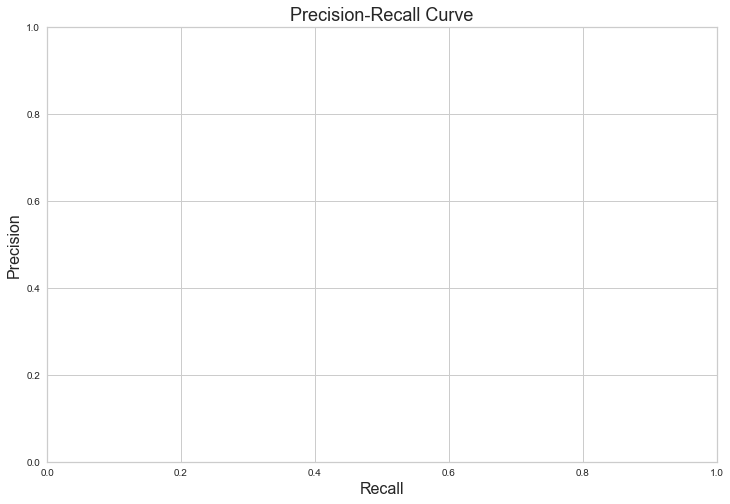

In [81]:
from yellowbrick.classifier import PrecisionRecallCurve
plt.figure(figsize=(12,8))
plt.title("Precision-Recall Curve", fontsize=18)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
viz = PrecisionRecallCurve(estimator, classes=classes)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
plt.legend(loc='center', fontsize=12)
plt.grid(False)

/var/folders/f2/h4nbcthd4cld5t6fzd1x3jg40000gn/T/ipykernel_6041/3651695446.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


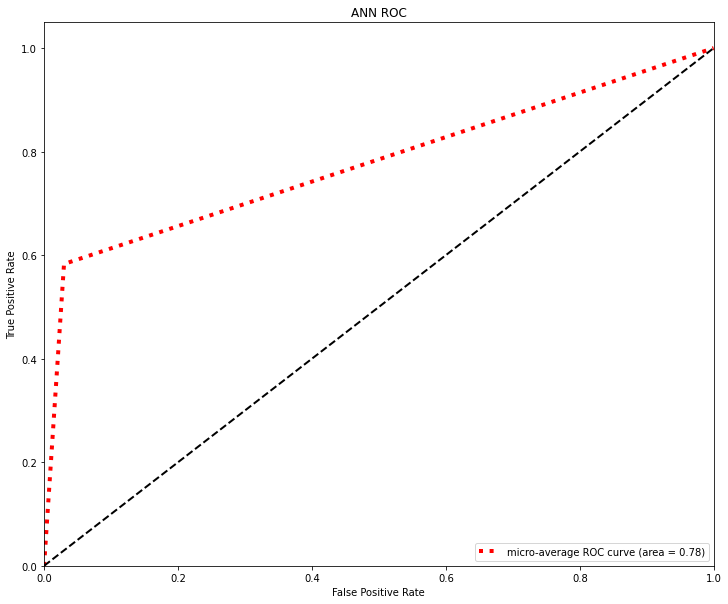

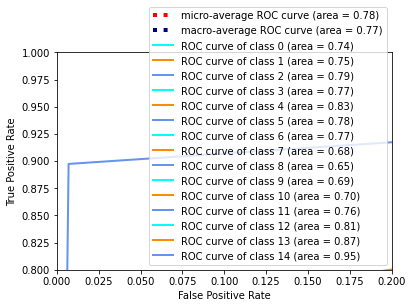

In [12]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(15):
    fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_pred_nn_optimal[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_train.ravel(), y_pred_nn_optimal.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(15)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(15):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 15

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig, ax = plt.subplots(figsize=(12,10))
plt.grid(False)
plt.figure(1)


plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='red', linestyle=':', linewidth=4)



plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC')
plt.legend(loc='lower right')
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='red', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(15), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend(loc='lower right')
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix
y_prediction = np.argmax (y_pred_nn_optimal, axis = 1)
y_test_f=np.argmax(y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test_f, y_prediction)
print(result)

[[  114    50    10    16     1     4     0     0     0     0     1     0
      0     0     0]
 [ 1448  2467  1183    67    13     7     2     2     0     1     0     3
      1     1     0]
 [  820  1234  4151   531    47    37     4     3     3    13     1     8
      2     2     1]
 [  170    17   286  1644   428   121    26    13     9    22     5    20
      5     4     3]
 [   86     1   128  1167  3872   711   118    20    19    20     9    50
     15    12     3]
 [   49     2    55   375  3066  9730  1429   158    52    58    21    32
      0     3    10]
 [   50     0    19   275   595  6046 12058  1981   539   299    55    98
      8    32    22]
 [   58     0    10   265   627   369  9289  7913  3769  1619   170   205
      5     9    17]
 [   68     0     9   213   663   245  1049  5476  7211  6838   731   674
     19     9    10]
 [   57     0     8   191   328   500   623   689  2785 11287  3856  2036
     83    64    13]
 [   54     0     1    27    37   242   694   403 

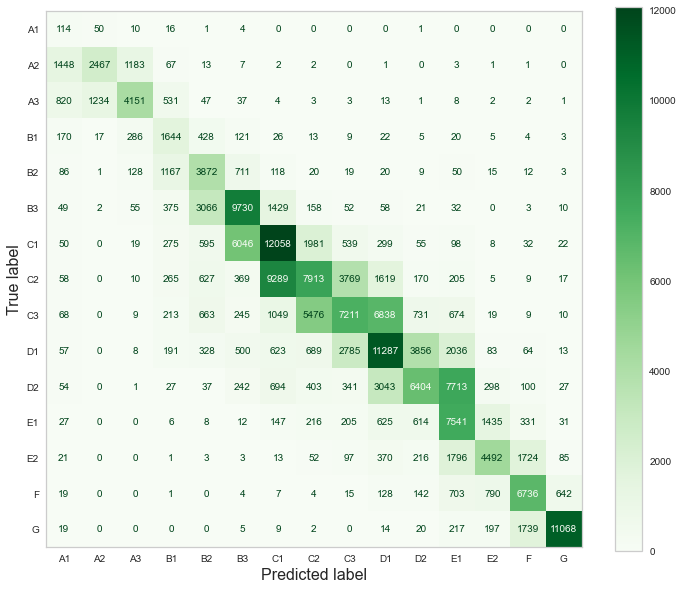

In [137]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes, )

fig, ax = plt.subplots(figsize=(12,10))
plt.grid(False)
disp.plot(cmap=plt.cm.Greens, ax=ax, values_format='')
plt.show()

YellowbrickTypeError: could not find feature importances param on KerasClassifier

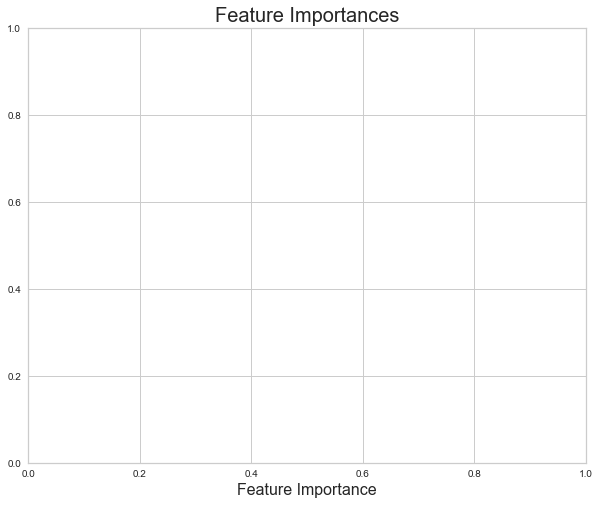

In [33]:
from yellowbrick.model_selection import FeatureImportances
plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.xlabel('Feature Importance')
visualizer_FI = FeatureImportances(estimator, labels=features, relative=False, colors=['#009E73'], title = 'Feature Importances in Optimal Model', xlabel='Feature Importance')
visualizer_FI.fit(X_train, y_train)
visualizer_FI.show();

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
matrix.diagonal()/matrix.sum(axis=1) * 100

array([49.48979592, 88.45043311, 87.47265568, 73.99927876, 78.18969668,
       84.20212766, 82.63803959, 79.95477903, 77.93237131, 76.70515098,
       78.35328106, 76.83514913, 77.053984  , 83.29887934, 92.75395034])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50       196
           1       0.89      0.88      0.89      5195
           2       0.88      0.87      0.88      6857
           3       0.65      0.74      0.69      2773
           4       0.75      0.78      0.77      6231
           5       0.82      0.84      0.83     15040
           6       0.85      0.83      0.84     22077
           7       0.84      0.80      0.82     24325
           8       0.81      0.78      0.79     23215
           9       0.80      0.77      0.79     22520
          10       0.79      0.78      0.79     19384
          11       0.68      0.77      0.72     11198
          12       0.71      0.77      0.74      8873
          13       0.77      0.83      0.80      9191
          14       0.94      0.93      0.94     13290

    accuracy                           0.81    190365
   macro avg       0.78      0.79      0.78    190365
weighted avg       0.81   

In [124]:
estimator

KerasClassifier(
	model=<function create_model at 0x1492e5af0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=256
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [135]:
estimator.model_.save('nn_optimal.h5')

---

## 5. Boxplot of Outliers